[View in Colaboratory](https://colab.research.google.com/github/monimoyd/sample_project/blob/master/1stDNN_Monimoy_Changes_99_04.ipynb)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


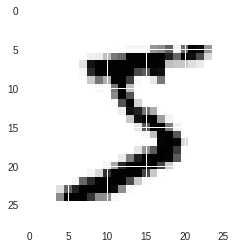

In [25]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [28]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [29]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
from keras.layers import Activation
from keras.layers import AveragePooling2D
model = Sequential()


model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(AveragePooling2D())
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserW

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 32)        2080      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 10)        170       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, batch_size=2048, nb_epoch=150, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/150
60000/60000 [==============================] - 6s 105us/step - loss: 2.1713 - acc: 0.1795
Epoch 2/150
60000/60000 [==============================] - 5s 91us/step - loss: 1.3537 - acc: 0.5022
Epoch 3/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.8041 - acc: 0.7478
Epoch 4/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.4866 - acc: 0.8600
Epoch 5/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.3482 - acc: 0.8977
Epoch 6/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.2870 - acc: 0.9151
Epoch 7/150
60000/60000 [==============================] - 5s 92us/step - loss: 0.2476 - acc: 0.9266
Epoch 8/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.2166 - acc: 0.9355
Epoch 9/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.1972 - acc: 0.9405
Epoch 10/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.1716 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [35]:
print(score)

[0.03839287002871497, 0.9891]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])